In [13]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, Tsit5, SaveAt, PIDController, Kvaerno3
import optax  
import pickle as pkl
from reaction_nets import rxn_net
from functools import partial
import scipy.optimize
import os
import equinox as eqx
from jax import make_jaxpr
import initialize_nets

In [14]:
jax.config.update("jax_enable_x64", True)

In [15]:
n_samples = 1000
species_list=['A', 'B', 'C']
solver=Tsit5()
stepsize_controller=PIDController(0.005, 0.01)
t_points=jnp.linspace(0.0, 10.0, 100)
dt0=0.001
max_steps=10000

For topology B, generating training data set, plotting to ensure data set looks correct, and saving.  

In [4]:
#generate network
network_type='triangle_b'
rxn, initial_params, initial_conditions, true_params=initialize_nets.initialize_rxn_net(network_type)

#generate training data 
training_data_type='simple_monotonic'
train_features, train_labels, val_features, val_labels = initialize_nets.gen_training_data(rxn, training_data_type, n_samples, true_params, initial_conditions, solver, stepsize_controller, t_points, dt0, max_steps)

Features shape: (1000,)
Labels shape: (1000, 3)


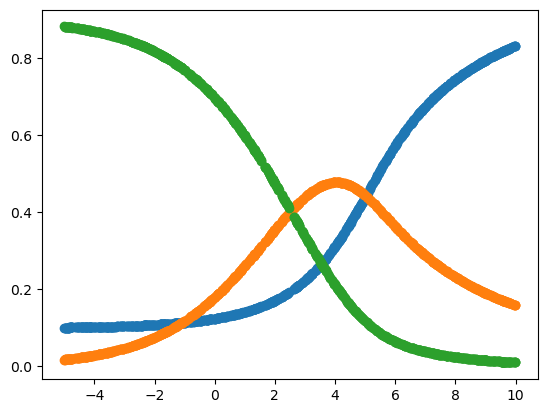

In [5]:
for species, profile in zip(species_list, train_labels.T):
    plt.scatter(train_features, profile, label=f'{species}')

In [6]:
init_data_b={'network_type': network_type, 'initial_params':initial_params, 'initial_conditions':initial_conditions, 'true_params': true_params, 'training_data_type':training_data_type, 'train_features': train_features, 'train_labels': train_labels, 'val_features':val_features, 'val_labels': val_labels, 'solver':solver, 'stepsize_controller':stepsize_controller, 't_points':t_points, 'dt0':dt0, 'max_steps':max_steps}

In [7]:
init_data_file=f'data/init_data/{network_type}'

f=open(init_data_file, 'wb')
pkl.dump(init_data_b, f)
f.close()

Doing the same for the other two topologies. 

In [16]:
network_type='triangle_a'
rxn, initial_params, initial_conditions, true_params=initialize_nets.initialize_rxn_net(network_type)
training_data_type='simple_monotonic'
train_features, train_labels, val_features, val_labels = initialize_nets.gen_training_data(rxn, training_data_type, n_samples, true_params, initial_conditions, solver, stepsize_controller, t_points, dt0, max_steps)

Features shape: (1000,)
Labels shape: (1000, 3)


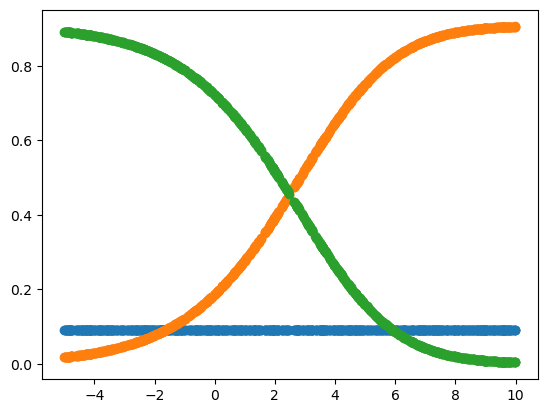

In [17]:
for species, profile in zip(species_list, train_labels.T):
    plt.scatter(train_features, profile, label=f'{species}')

In [18]:
init_data_a={'network_type': network_type, 'initial_params':initial_params, 'initial_conditions':initial_conditions, 'true_params': true_params, 'training_data_type':training_data_type, 'train_features': train_features, 'train_labels': train_labels, 'val_features':val_features, 'val_labels': val_labels, 'solver':solver, 'stepsize_controller':stepsize_controller, 't_points':t_points, 'dt0':dt0, 'max_steps':max_steps}

In [ ]:
print(init_data_a)

In [19]:
init_data_file=f'data/init_data/{network_type}'
f=open(init_data_file, 'wb')
pkl.dump(init_data_a, f)
f.close()

In [12]:
network_type='triangle_c'
rxn, initial_params, initial_conditions, true_params=initialize_nets.initialize_rxn_net(network_type)
training_data_type='simple_monotonic'
train_features, train_labels, val_features, val_labels = initialize_nets.gen_training_data(rxn, training_data_type, n_samples, true_params, initial_conditions, solver, stepsize_controller, t_points, dt0, max_steps)

Features shape: (1000,)
Labels shape: (1000, 3)


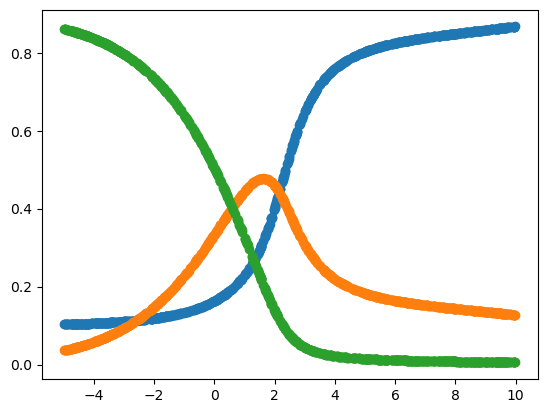

In [22]:
for species, profile in zip(species_list, train_labels.T):
    plt.scatter(train_features, profile, label=f'{species}')

In [ ]:
init_data_c={'network_type': network_type, 'initial_params':initial_params, 'initial_conditions':initial_conditions, 'true_params': true_params, 'training_data_type':training_data_type, 'train_features': train_features, 'train_labels': train_labels, 'val_features':val_features, 'val_labels': val_labels, 'solver':solver, 'stepsize_controller':stepsize_controller, 't_points':t_points, 'dt0':dt0, 'max_steps':max_steps} 

In [ ]:
print(init_data_c)

In [25]:
init_data_file=f'data/init_data/{network_type}'
f=open(init_data_file, 'wb')
pkl.dump(init_data_c, f)
f.close()